## Load modules

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta, date, datetime

## Combine all weeks

In [2]:
base_name='pulse2020_puf_'
df_lists=[]

for f in os.listdir('../data'):
    if base_name in f:
        data=pd.read_csv(os.path.join('../data',f))
        #print(data.head())
        df_lists.append(data)
final_data = pd.concat(df_lists)
# final_data.to_excel(os.path.join('../data',base_name+'all.xlsx'))

## Data Cleaning

Check which any value is empty

In [3]:
final_data.isnull().values.any()

True

Check how many values are empty

In [4]:
 final_data.isnull().sum().sum()

123743289

Check which columns are empty

In [5]:
empty_cols = [col for col in final_data.columns if final_data[col].isnull().any()]
print(empty_cols)

['EST_MSA', 'MORTLMTH', 'TSCHLHRS', 'TTCH_HRS', 'CHILDFOOD', 'TSTDY_HRS', 'EIP', 'EIPSPND1', 'EIPSPND2', 'EIPSPND3', 'EIPSPND4', 'EIPSPND5', 'EIPSPND6', 'EIPSPND7', 'EIPSPND8', 'EIPSPND9', 'EIPSPND10', 'EIPSPND11', 'EIPSPND12', 'EIPSPND13', 'SPNDSRC1', 'SPNDSRC2', 'SPNDSRC3', 'SPNDSRC4', 'SPNDSRC5', 'SPNDSRC6', 'SPNDSRC7', 'REGION', 'HWEIGHT', 'TW_START', 'UI_APPLY', 'UI_RECV', 'TUI_NUMPER', 'SSA_RECV', 'SSA_APPLY', 'SSAPGM1', 'SSAPGM2', 'SSAPGM3', 'SSAPGM4', 'SSAPGM5', 'SSALIKELY', 'SSAEXPCT1', 'SSAEXPCT2', 'SSAEXPCT3', 'SSAEXPCT4', 'SSAEXPCT5', 'SSADECISN', 'EXPNS_DIF', 'CHNGHOW1', 'CHNGHOW2', 'CHNGHOW3', 'CHNGHOW4', 'CHNGHOW5', 'CHNGHOW6', 'CHNGHOW7', 'CHNGHOW8', 'CHNGHOW9', 'CHNGHOW10', 'CHNGHOW11', 'CHNGHOW12', 'WHYCHNGD1', 'WHYCHNGD2', 'WHYCHNGD3', 'WHYCHNGD4', 'WHYCHNGD5', 'WHYCHNGD6', 'WHYCHNGD7', 'WHYCHNGD8', 'WHYCHNGD9', 'WHYCHNGD10', 'WHYCHNGD11', 'WHYCHNGD12', 'WHYCHNGD13', 'SPNDSRC8', 'FEWRTRIPS', 'FEWRTRANS', 'PLNDTRIPS', 'CNCLDTRPS', 'SNAP_YN', 'SNAPMNTH1', 'SNAPMNTH2', 

For each columns, how many values are missing

In [6]:
for col in empty_cols:
    print(col,(final_data[col].isnull().sum())/(1.0*len(final_data)))


EST_MSA 0.6921089225090093
MORTLMTH 0.09107582065619088
TSCHLHRS 0.09107582065619088
TTCH_HRS 0.09107582065619088
CHILDFOOD 0.3805447795784911
TSTDY_HRS 0.3805447795784911
EIP 0.5411917001081542
EIPSPND1 0.5411917001081542
EIPSPND2 0.5411917001081542
EIPSPND3 0.5411917001081542
EIPSPND4 0.5411917001081542
EIPSPND5 0.5411917001081542
EIPSPND6 0.5411917001081542
EIPSPND7 0.5411917001081542
EIPSPND8 0.5411917001081542
EIPSPND9 0.5411917001081542
EIPSPND10 0.5411917001081542
EIPSPND11 0.5411917001081542
EIPSPND12 0.5411917001081542
EIPSPND13 0.5411917001081542
SPNDSRC1 0.4501158794519633
SPNDSRC2 0.4501158794519633
SPNDSRC3 0.4501158794519633
SPNDSRC4 0.4501158794519633
SPNDSRC5 0.4501158794519633
SPNDSRC6 0.4501158794519633
SPNDSRC7 0.4501158794519633
REGION 0.9089241793438091
HWEIGHT 0.9089241793438091
TW_START 0.9089241793438091
UI_APPLY 0.9089241793438091
UI_RECV 0.9089241793438091
TUI_NUMPER 0.9089241793438091
SSA_RECV 0.9089241793438091
SSA_APPLY 0.9089241793438091
SSAPGM1 0.90892417

As per the field, might need pre-processing

In [7]:
final_data = final_data[((final_data.ANXIOUS != -99) & (final_data.ANXIOUS!= -88)) &
               ((final_data.WORRY != -99) & (final_data.WORRY != -88)) &
               ((final_data.INTEREST != -99) & (final_data.INTEREST != -88)) &
               ((final_data.DOWN != -99) & (final_data.DOWN != -88))]

final_data.reset_index(inplace=True, drop=True)

In [8]:
final_data['Anxiety'] = final_data['ANXIOUS'] + final_data['WORRY'] - 2
final_data['Depression'] = final_data['INTEREST'] + final_data['DOWN'] - 2

In [9]:
def anxiety_disorder(anxiety_score):
    """ The sum of the variables ANXIOUS AND WORRY - 2 must be at least 3 to consider an anxiety disorder
    """
    return True if anxiety_score >= 3 else False

def depression_disorder(depression_score):
    """ The sum of the variables INTEREST AND DOWN - 2 must be at least 3 to consider an anxiety disorder
    """
    return True if depression_score >= 3 else False

In [10]:
final_data['anxiety_disorder'] = final_data.Anxiety.apply(anxiety_disorder)
final_data['depression_disorder'] = final_data.Depression.apply(anxiety_disorder)

Include the age

In [11]:
final_data['AGE']=datetime.now().year-final_data['TBIRTH_YEAR']

Manually adding mid dates of each period due to lack of continuity

In [12]:
import datetime

dates=[date(2020,4,29),date(2020,5,9),date(2020,5,14),date(2020,5,23),date(2020,5,30),date(2020,6,6),date(2020,6,13),\
       date(2020,6,20),date(2020,6,27),date(2020,7,4),date(2020,7,11),date(2020,7,18),date(2020,8,25),date(2020,9,8)]

final_data['DATE']=''
for i,dt in enumerate(dates):
    idx_dt=final_data.index[final_data['WEEK'] == i+1].tolist()
    final_data['DATE'][idx_dt]=dt


c:\users\ee11b\lung and glioma\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\ee11b\lung and glioma\venv\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\users\ee11b\lung and glioma\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

## Analyzing Anxiety, Depression and Income

In [13]:
income_df = final_data.loc[:, ['SCRAM', 'DATE','WEEK', 'AGE','REGION','EST_ST', 'EST_MSA','INCOME','EGENDER', 'RHISPANIC', 
                              'RRACE', 'EEDUC', 'THHLD_NUMPER','anxiety_disorder','depression_disorder','WRKLOSS','EXPCTLOSS',
                              'ANYWORK','KINDWORK','RSNNOWRK','TW_START','UNEMPPAY','UI_APPLY','UI_RECV','TUI_NUMPER','SSA_RECV',
                              'SSA_APPLY','SSALIKELY','SSADECISN','EXPNS_DIF','HLTHSTATUS','ANXIOUS', 'WORRY', 'INTEREST', 'DOWN']]

In [14]:
income_df['COUNTER']=1
income_df=income_df[income_df.INCOME>0]
# income_df.to_excel(os.path.join('../data',base_name+'income.xlsx'))

## Income distribution

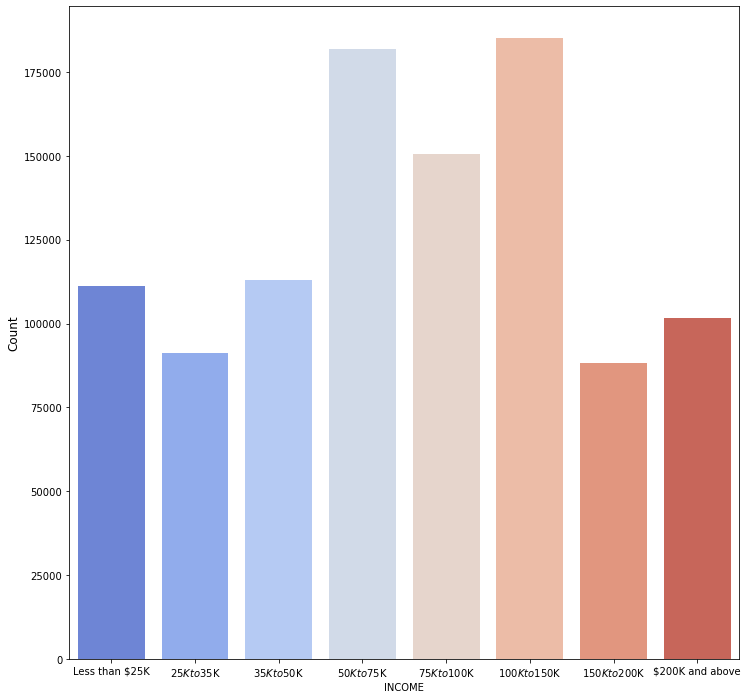

In [144]:
income_ranges=['Less than $25K','$25K to $35K','$35K to $50K','$50K to $75K','$75K to $100K','$100K to $150K','$150K to $200K','$200K and above']
x1 = [i for i in range(len(income_ranges))]

fig, ax = plt.subplots(figsize=(12, 12))

_ = sns.countplot(x='INCOME', data=income_df, palette='coolwarm')
_ = plt.ylabel('Count', size=12)
_ = ax.set_xticks(x1)
_ = ax.set_xticklabels(income_ranges, minor=False, rotation=0)


In [168]:
income_df['INCOME'].describe()

count    1.022933e+06
mean     4.549944e+00
std      2.092639e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      6.000000e+00
max      8.000000e+00
Name: INCOME, dtype: float64

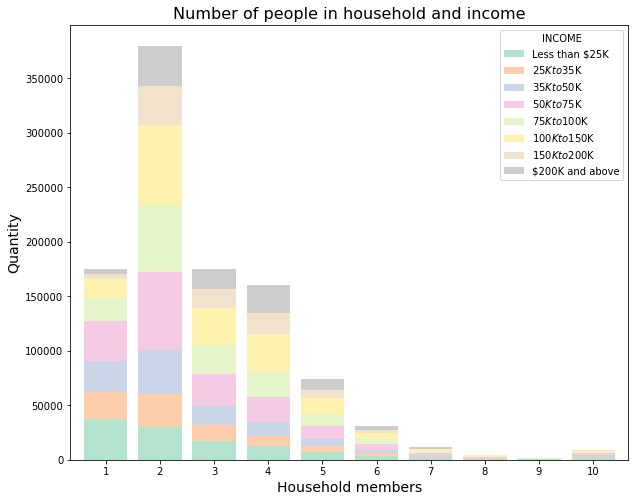

In [180]:
test1 = income_df[income_df.THHLD_NUMPER > 0].groupby(['THHLD_NUMPER', 'INCOME',])['COUNTER'].count().unstack('INCOME').fillna(0)

# test1
fig, ax = plt.subplots(figsize=(10, 8))
_ = test1.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap=plt.cm.get_cmap('Pastel2', 8))
_ = plt.title('Number of people in household and income', size=16)
_ = plt.xlabel('Household members', size=14)
_ = plt.ylabel('Quantity', size=14)
_ = plt.xticks(rotation=0)
_ = plt.legend(title='INCOME', loc='upper right', labels=income_ranges)

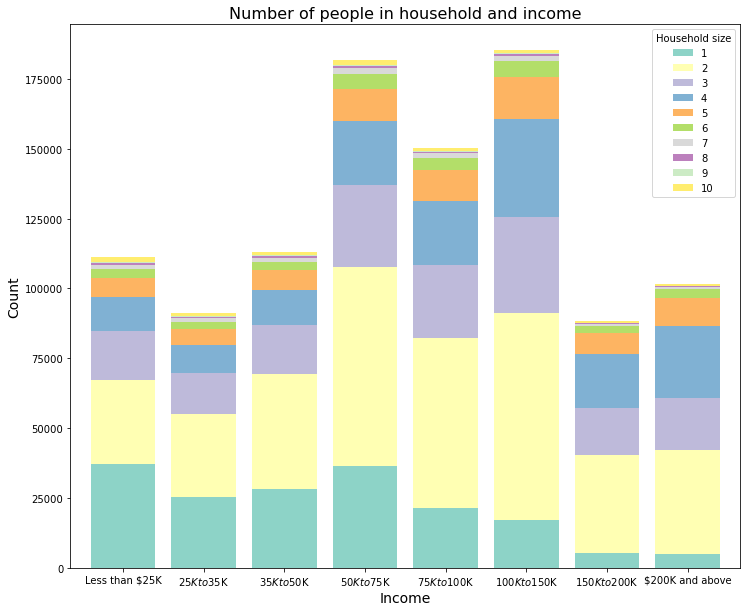

In [190]:
test1 = income_df[income_df.THHLD_NUMPER > 0].groupby(['THHLD_NUMPER', 'INCOME',])['COUNTER'].count().unstack('THHLD_NUMPER').fillna(0)

# test1
fig, ax = plt.subplots(figsize=(12, 10))
_ = test1.plot(kind='bar', stacked=True, ax=ax, width=0.8, cmap=plt.cm.get_cmap('Set3', 10))
_ = plt.title('Number of people in household and income', size=16)
_ = plt.xlabel('Income', size=14)
_ = plt.ylabel('Count', size=14)
_ = plt.xticks(rotation=0)
_ = plt.legend(title='Household size', loc='upper right')#, labels=income_ranges)
_ = ax.set_xticklabels(income_ranges, minor=False, rotation=0)

In [145]:
for i,income in enumerate(income_ranges):
    income_df_range=income_df[income_df['INCOME']==i+1]
    df_base = income_df_range.groupby(['anxiety_disorder', 'depression_disorder']).count().COUNTER
    print(income,df_base/df_base.sum())                                                 

Less than $25K anxiety_disorder  depression_disorder
False             False                  0.481487
                  True                   0.065802
True              False                  0.126424
                  True                   0.326287
Name: COUNTER, dtype: float64
$25K to $35K anxiety_disorder  depression_disorder
False             False                  0.564932
                  True                   0.058389
True              False                  0.125910
                  True                   0.250769
Name: COUNTER, dtype: float64
$35K to $50K anxiety_disorder  depression_disorder
False             False                  0.605577
                  True                   0.052671
True              False                  0.123960
                  True                   0.217792
Name: COUNTER, dtype: float64
$50K to $75K anxiety_disorder  depression_disorder
False             False                  0.647273
                  True                   0.045094
True

In [146]:

#     _ = plt.title('Anxiety/Depression Disorders in surveyed people with under 18 years old members at home', size=1)

In [147]:
append_df=[]# pd.DataFrame(columns=['anxiety_disorder', 'depression_disorder','DATE','COUNTER','INCOME'])
for i ,income in enumerate(income_ranges):
    income_df_range=income_df[income_df['INCOME']==i+1]
    df_base = income_df_range.groupby(['anxiety_disorder', 'depression_disorder','DATE','WEEK']).count().COUNTER
    #     df_base/df_base.sum()
#     df_base_plot = df_base/df_base.sum()
    df = df_base.reset_index()
    df['INCOME']=i+1
    append_df.append(df)
#     append_df.merge(df, on='INCOME')#how='outer')


In [148]:
income_df1=pd.concat(append_df).reset_index()
group_vars=['anxiety_disorder', 'depression_disorder']
income_df1['idx'] = income_df1.groupby(group_vars).ngroup()

In [149]:
income_df1

,index,anxiety_disorder,depression_disorder,DATE,WEEK,COUNTER,INCOME,idx
0,0,False,False,2020-04-29,1,3857,1,0
1,1,False,False,2020-05-09,2,2155,1,0
2,2,False,False,2020-05-14,3,5886,1,0
3,3,False,False,2020-05-23,4,4291,1,0
4,4,False,False,2020-05-30,5,4718,1,0
...,...,...,...,...,...,...,...,...
411,47,True,True,2020-06-27,9,693,8,3
412,48,True,True,2020-07-04,10,698,8,3
413,49,True,True,2020-07-11,11,729,8,3
414,50,True,True,2020-07-18,12,698,8,3


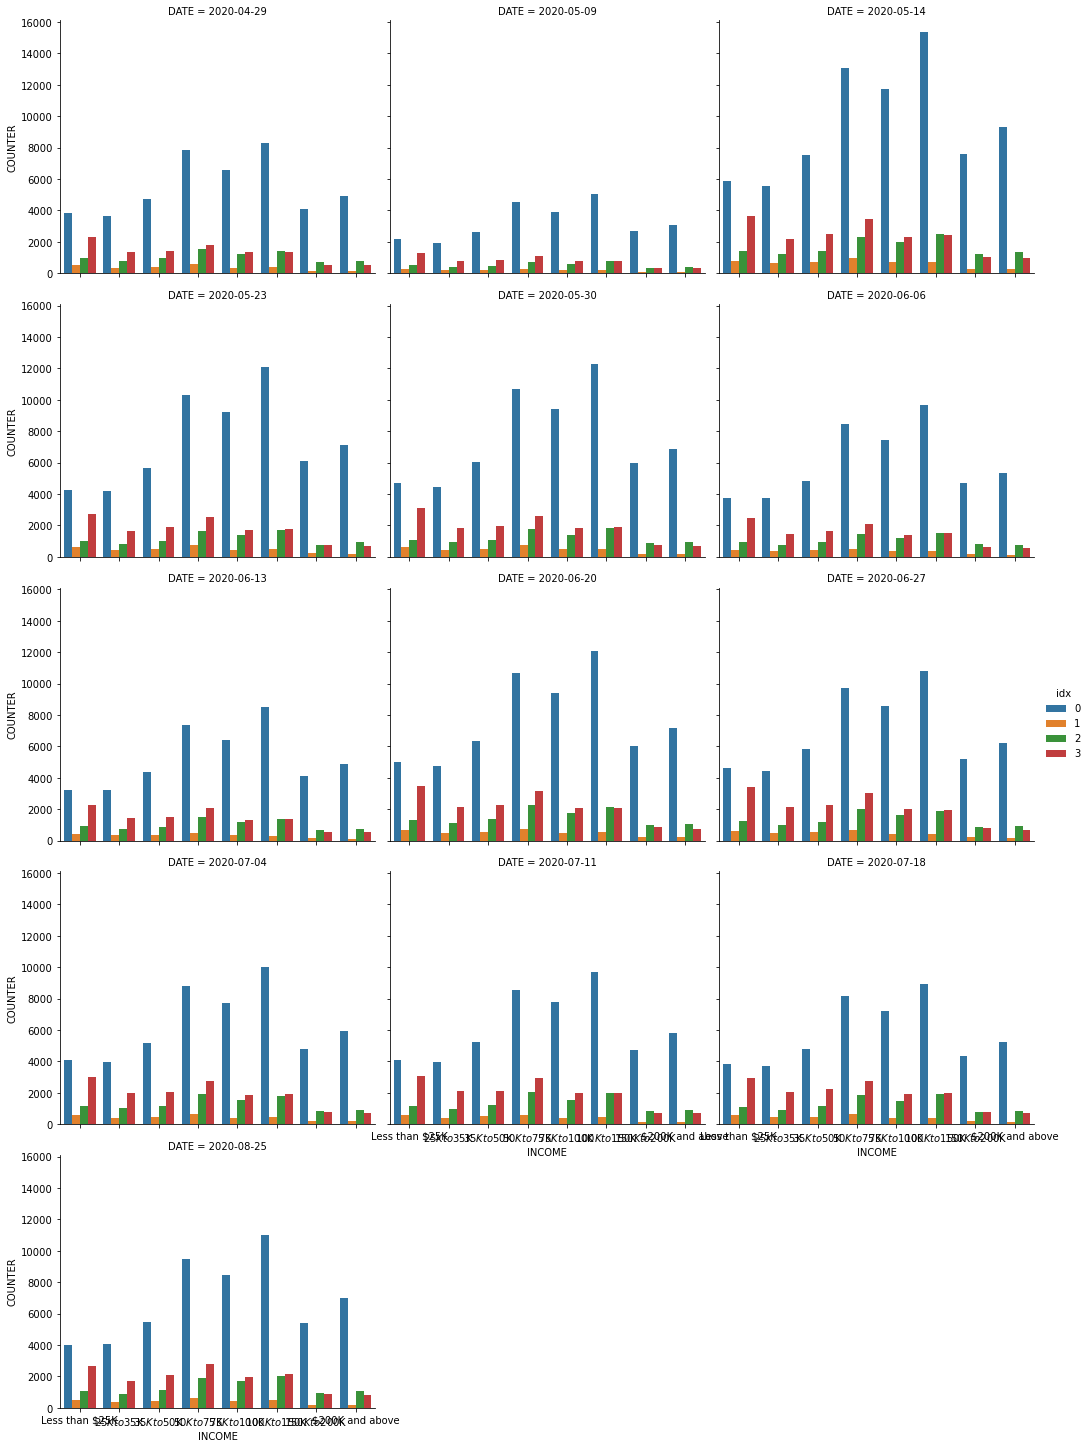

In [150]:
# sns.barplot(data=income_df1, y='COUNTER', x=income_df1.idx)
# See how each income group has been doing over weeks
g=sns.catplot(x="INCOME", y="COUNTER",
                hue="idx",col="DATE",
                data=income_df1, kind="bar",col_wrap=3,
                height=4, aspect=1.2);
g.set_xticklabels(income_ranges)

## Analyzing each income group

**For income group 1**

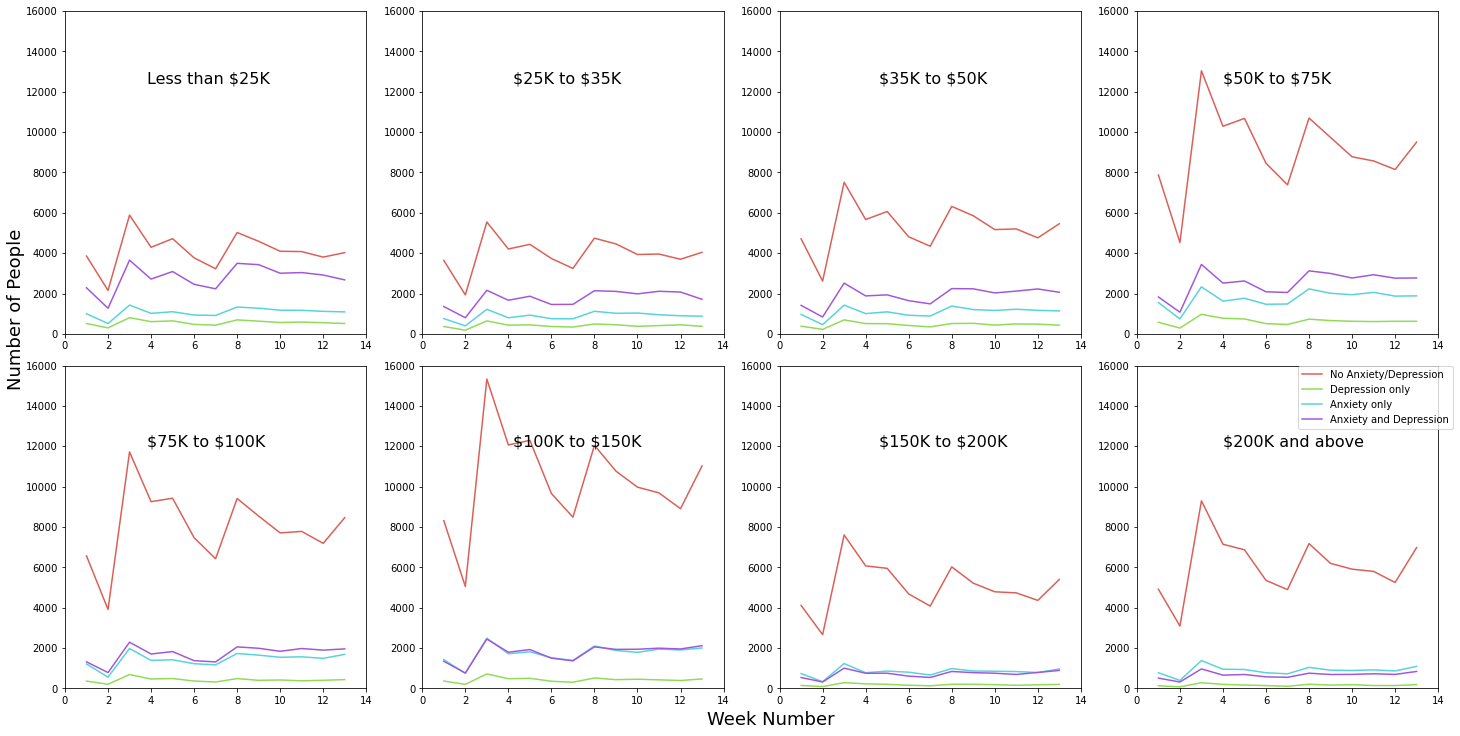

In [165]:
# fig = plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
for i,income in enumerate(income_ranges):
    income_df_range=income_df1[income_df1['INCOME']==i+1]
#     income_df_range[]
    plt.subplot(2,4,i+1)
    labels = ['No Anxiety/Depression', 
               'Depression only', 
               'Anxiety only',
               'Anxiety and Depression']

    g=sns.lineplot(data=income_df_range, x="WEEK", y="COUNTER",hue="idx",palette=sns.color_palette("hls", 4))#,hue_order=labels)
    g.set(xlim=(0,14),ylim=(0,16000))
    g.get_legend().set_visible(False)
    g.set(xlabel=None)
    g.set(ylabel=None)
    
#     g.get_xaxis().set_visible(False)
#     g.get_yaxis().set_visible(False)
# frame1.axes.get_yaxis().set_visible(False)
# plt.legend(title='', labels=labels)
plt.tight_layout()

# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("common X")
# plt.ylabel("common Y")
# plt.xlabel("WEEK")
# plt.ylabel("COUNTER")
plt.text(-20, -1800, r'Week Number',fontsize=18)
plt.text(-52.5, 15000, r'Number of People',fontsize=18,rotation=90)
plt.text(-46, 30000, income_ranges[0],fontsize=16)
plt.text(-29, 30000, r'\$25K to \$35K',fontsize=16)
plt.text(-12, 30000, r'\$35K to \$50K',fontsize=16)
plt.text(4, 30000, r'\$50K to \$75K',fontsize=16)
plt.text(-46, 12000, r'\$75K to \$100K',fontsize=16)
plt.text(-29, 12000, r'\$100K to \$150K',fontsize=16)
plt.text(-12, 12000, r'\$150K to \$200K',fontsize=16)
plt.text(4, 12000, r'\$200K and above',fontsize=16)
# plt.text(-29, 32000, r'\$25K to \$35K',fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.,labels=labels)
plt.show()
